<a href="https://colab.research.google.com/github/ChristianConchari/Computer-Vision-Notes/blob/master/Tutorial_8_Hough_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial 8: Hough Transform

Now that you've seen how to define and use image filters for smoothing images and detecting the edges in an image, let's move one step further. It's time to make sense of those edges! 

The first method that we will explore is the Hough Transform, which transforms image data from the x-y coordinate system into Hough space, where you can easily identify simple boundaries like lines and circles.

### Import resources and display the image

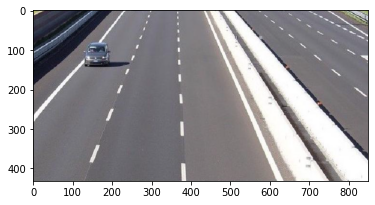

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

%matplotlib inline

# Read in the image
image = cv2.imread('road.png')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Perform edge detection

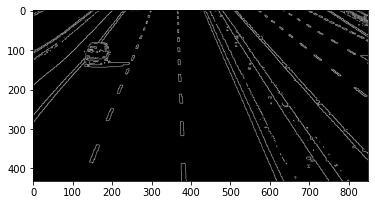

In [ ]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 200
high_threshold = 250
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

### Find lines using a Hough transform

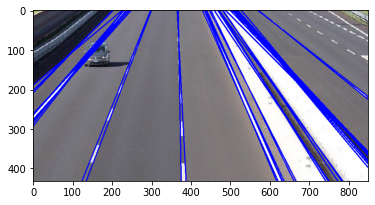

In [ ]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 90

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLines(edges, rho, theta, threshold)

# Iterate over the output "lines" and draw lines on the image copy
if lines is not None:
  for line in lines:
    # Stores the value of cos(theta) in a and sin(theta) in b
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)

    # x0 stores the value rcos(theta) and y0 stores the value rsin(theta) 
    x0 = a*rho
    y0 = b*rho

    # rounded off the values
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in line_image from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line and 2 denotes the thickness.  
    cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),2)
     
plt.imshow(line_image)

## Exerice 1: Probabilistic hough transform
Apart from the cv2.HoughLines() function, the OpenCV library has the probabilistic Hough transform. Implement Probabilistic hough transform with a similar image. Then, describe the approaches and differences between both methods. What are the advantages of using Probabilistic hough transform? 

SOLUTION:
------


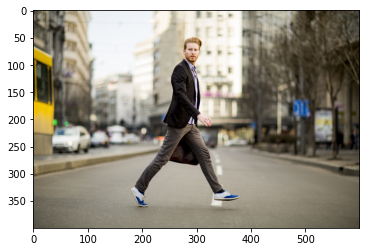

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import ipywidgets as widgets 

%matplotlib inline

# Read in the image
image = cv2.imread('person.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

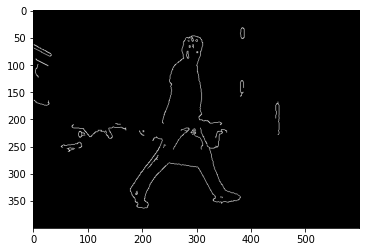

In [ ]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


# applies gaussian blur with standar deviation  = 0 
kernel_size = 15
# parameters: image, kernel dimensions, sigma x, sigma y
gaussian = cv2.GaussianBlur(gray,(kernel_size,kernel_size),0.3,0.5)

# Define our parameters for Canny
low_threshold = 200
high_threshold = 450

edges = cv2.Canny(gaussian, low_threshold, high_threshold,apertureSize = 3)

plt.imshow(edges, cmap='gray')

In [ ]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180

@widgets.interact(
  minLineLength = widgets.IntSlider(value = 8, min=0, max=40),
  maxLineGap = widgets.IntSlider(value = 2, min=0, max=40),
  threshold = widgets.IntSlider(value = 15, min=0, max=350),
)
def gen_plot(
  minLineLength = 8,
  maxLineGap = 2,
  threshold = 15,
):
  line_image = np.copy(image) #creating an image copy to draw lines on

  # Run Hough on the edge-detected image
  lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), minLineLength, maxLineGap)

  for this_line in lines:
    cv2.line(image,
            (this_line[0][0], this_line[0][1]),
            (this_line[0][2], this_line[0][3]),
            [0, 0, 255], 3, 8)

  plt.figure(figsize = (100,10))
  plt.imshow(line_image)

interactive(children=(IntSlider(value=8, description='minLineLength', max=40), IntSlider(value=2, description=…